In [1]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

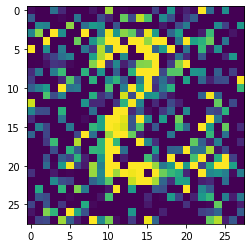

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [5]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [6]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=256,
                validation_data=(x_test_noisy, x_test))

Epoch 1/200
235/235 [==============================] - 4s 18ms/step - loss: 0.2147 - val_loss: 0.2136 ETA: 2s - los
Epoch 2/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2131 - val_loss: 0.2119
Epoch 3/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2114 - val_loss: 0.2102s: 0.21 - ETA: 2s - ETA:
Epoch 4/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2098 - val_loss: 0.2086oss: 0. - ETA: 2 - ETA: 1s - los - ETA: 0s - loss: 0.21 - ETA: 0s - loss:
Epoch 5/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2082 - val_loss: 0.2070
Epoch 6/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2066 - val_loss: 0.2054
Epoch 7/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2051 - val_loss: 0.2039 1s - loss: 0.2 -  - ETA: 0s - loss: 0.205
Epoch 8/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2036 - val_loss: 0.20242s - lo - ETA: 2s - loss: 0. - E

235/235 [==============================] - 4s 17ms/step - loss: 0.1638 - val_loss: 0.1626
Epoch 71/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1635 - val_loss: 0.1623
Epoch 72/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1632 - val_loss: 0.162016 - ETA: 2s - loss: 0.1 - ETA: 1s - loss: 0
Epoch 73/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1629 - val_loss: 0.1617 1s - loss: 0 - ETA: 1s - loss - ETA: 0s - loss: 0.1 - ETA: 0s - los
Epoch 74/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1626 - val_loss: 0.1614- ETA: 0s - loss: 0.162 - ETA: 0s - loss: 0.162
Epoch 75/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1623 - val_loss: 0.1611
Epoch 76/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1621 - val_loss: 0.1608
Epoch 77/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1618 - val_loss: 0.1605
Epoch 78/200
235/235 [========

235/235 [==============================] - 4s 17ms/step - loss: 0.1493 - val_loss: 0.1479- loss:  - ETA: 2s - l - ETA - ETA: 0s - loss: 0.
Epoch 140/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1491 - val_loss: 0.1477
Epoch 141/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1490 - val_loss: 0.1476
Epoch 142/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1488 - val_loss: 0.1474
Epoch 143/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1487 - val_loss: 0.1473 ETA: 0s - loss: 0.14
Epoch 144/200
235/235 [==============================] - 4s 18ms/step - loss: 0.1485 - val_loss: 0.14710s - los
Epoch 145/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1484 - val_loss: 0.14700.14 - ETA: 0s - loss: 0.
Epoch 146/200
235/235 [==============================] - 4s 17ms/step - loss: 0.1482 - val_loss: 0.1468
Epoch 147/200
235/235 [==============================] - 4s 18ms/step - loss: 0

In [9]:
result = autoencoder.predict((x_test_noisy[1].reshape(1, 28, 28, 1)))

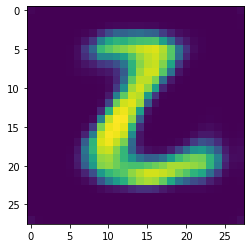

In [10]:
plt.imshow(result.reshape(28, 28))